<a href="https://colab.research.google.com/github/UpEon/1st/blob/main/secstion2_1(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀(Linear Regression)

* 선형회귀모델을 이해합니다.
* 지도학습(Supervised Learning)을 이해합니다.
* 회귀모델에 기준모델을 설정할 수 있습니다.
* Scikit-learn을 이용해 선형 회귀 모델을 만들어 사용하고 해석할 수 있습니다.

지도학습(Supervised Learning)에는 두 가지 방식이 있습니다: 회귀(Regression) and 분류(Classification)\
        - “How Much / How Many?” (회귀)\
        - “Is this A or B?” (분류)\
회귀분석과, 분류의 타겟 특성은 무엇이 다른가요?

#### 사용하는 변수는 다음과 같습니다.
- SalePrice: 우리가 예측해야 하는 타겟값으로 주택판매가격(달러) 입니다.
- LotArea: 집과 마당의 사이즈(square feet)
- GrLivArea: 지상 생활면적(square feet)

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

## 주택의 판매 가격을 어떻게 예측할 수 있을까요?

In [2]:
# 주어진 url 주소를 이용해 house prices 데이터를 가져옵니다.
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_train.csv')
df_t = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_test.csv')

In [3]:
## head()로 데이터를 살펴봅니다.
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
## 여러 특성 중 'GrLivArea', 'LotArea', 'SalePrice'를 사용합니다.
df = df[['GrLivArea', 'LotArea', 'SalePrice']]
df_t = df_t[['GrLivArea', 'LotArea']]

### 주택 판매 가격을 예측하려고 할 때 여러분은 다음과 같은 방법을 사용할 수 있습니다

#### 1. 기존 경험을 바탕으로 예측

한마디로 대충 어림짐작하는 것 입니다. 예를 들어 밤 하늘에 달무리가 진 것을 보고 다음날 날씨가 흐릴 것을 예측하는 것과 같습니다.

보통 좋은 결과를 내기도 하지만 사람마다 편견이 존재하며 오류에 빠질 위험이 높습니다.

#### 2. 통계정보를 활용

`SalePrice`의 통계 정보를 확인해 보겠습니다.

In [6]:
# SalePrice의 최소, 최대, 평균, 중앙값 계산
df['SalePrice'].min(), df['SalePrice'].max(), df['SalePrice'].mean(), df['SalePrice'].median()

(34900, 755000, 180921.19589041095, 163000.0)

In [78]:
# pandas 포멧팅을 사용하면, 판다스 객체들의 결과에서 쉼표를 넣고 소숫점 아래는 생략하도록 설정할 수 있습니다.
# float 형식 소숫점 1자리, 쉼표 포함

# pd.set_option('display.float_format', '{:,.1f}'.format)

# 기본 셋팅으로 돌아오기 위해서

pd.set_option('display.float_format', None) 

In [9]:
## SalePrice 통계 정보를 요약해서 확인할 수도 있습니다.
df['SalePrice'].describe()

count     1,460.0
mean    180,921.2
std      79,442.5
min      34,900.0
25%     129,975.0
50%     163,000.0
75%     214,000.0
max     755,000.0
Name: SalePrice, dtype: float64

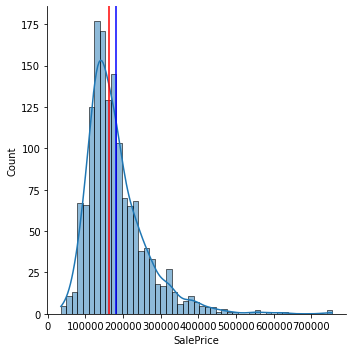

In [10]:
## SalePrice의 확률밀도함수를 그려보겠습니다
sns.displot(df['SalePrice'], kde=True)

## 평균과, 중간값으로 수직선을 그려보겠습니다.
plt.axvline(df['SalePrice'].mean(), color='blue')
plt.axvline(df['SalePrice'].median(), color='red');

만일 가격을 처음으로 예측한다고 할 때, 가장 간단하고 직관적인 방법으로 평균이나 중간값을 이용해 보는 것도 좋은 선택일 것입니다.

#### 기준모델(Baseline Model)
이렇게 예측 모델을 구체적으로 만들기 전에 가장 간단하면서도 직관적이면서 최소한의 성능을 나타내는 기준이 되는 모델을 기준모델 이라고 합니다.
여기서는 평균값을 기준으로 사용해서 평균기준모델이라고 말할 수 있겠습니다.

참고로 문제별로 기준모델은 보통 다음과 같이 설정합니다.
- 분류문제: 타겟의 최빈 클래스
- 회귀문제: 타겟의 평균값
- 시계열회귀문제: 이전 타임스탬프의 값

In [11]:
## predict: 우리가 정한 기준모델인 평균으로 예측을 합니다
predict = df['SalePrice'].mean()

In [12]:
## 평균값으로 예측할 때 샘플 별 평균값과의 차이(error)를 저장합니다
errors = predict - df['SalePrice']

In [13]:
errors

0      -27,578.8
1         -578.8
2      -42,578.8
3       40,921.2
4      -69,078.8
          ...   
1455     5,921.2
1456   -29,078.8
1457   -85,578.8
1458    38,796.2
1459    33,421.2
Name: SalePrice, Length: 1460, dtype: float64

In [14]:
## mean_absolute_error(MAE), error에 절대값을 취한 후 평균을 계산합니다.
mean_absolute_error = errors.abs().mean()

Mean Absolute Error(MAE, 평균절대오차) 는 예측 error 의 절대값 평균을 나타냅니다.

$$Error = (price - guess)$$

\begin{align}mae = (\frac{1}{n})\sum_{i=1}^{n}\left | price_{i} - guess_{i} \right |\end{align}

기준모델을 그려보겠습니다.

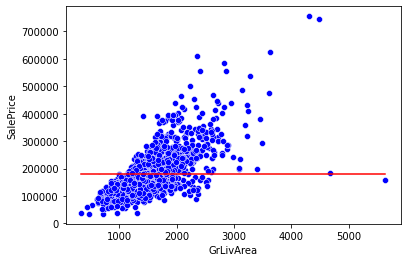

In [15]:
x = df['GrLivArea']
y = df['SalePrice']

predict = df['SalePrice'].mean()
errors = predict - df['SalePrice']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

In [16]:
print(f'예측한 주택 가격이 ${predict:,.0f}이며 절대평균에러가 ${mean_absolute_error:,.0f}임을 확인할 수 있습니다.')

예측한 주택 가격이 $180,921이며 절대평균에러가 $57,435임을 확인할 수 있습니다.


평균 예측은 에러가 상당히 크다는 것을 알 수 있었습니다.

혹시 주택 가격이 전체공간크기(LotArea)와 같은 다른 특성과 어떤 상관관계(dependent)가 있을까요? 이 관계를 시각적으로 살펴보겠습니다.

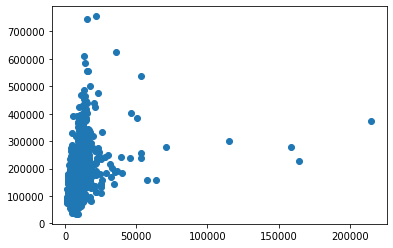

In [17]:
## matplotlib scatter plot: LotArea, SalePrice
plt.scatter(df['LotArea'], df['SalePrice']);

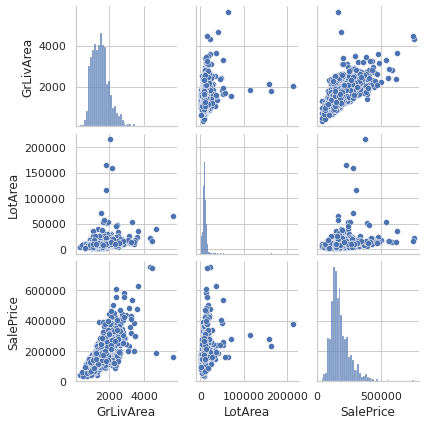

In [18]:
sns.set(style='whitegrid', context='notebook')
cols = ['GrLivArea', 'LotArea','SalePrice']
sns.pairplot(df[cols], height=2);

#### 3. 예측모델(Predictive Model) 활용

scatterplot에 가장 잘 맞는(best fit) 직선을 그려주면 그것이 회귀 예측모델이 됩니다.

그럼 회귀직선은 어떻게 만들 수 있을까요? 회귀분석에서 중요한 개념은 예측값과 잔차(residual) 입니다.
예측값은 만들어진 모델이 추정하는 값이고, 잔차는 예측값과 관측값 차이 입니다.(오차(error)는 모집단에서의 예측값과 관측값 차이를 말합니다.)

회귀선은 잔차 제곱들의 합인 RSS(residual sum of squares)를 최소화 하는 직선입니다. RSS는 SSE(Sum of Square Error)라고도 말하며 이 값이 회귀모델의 비용함수(Cost function)가 됩니다. 머신러닝에서는 이렇게 비용함수를 최소화 하는 모델을 찾는 과정을 학습이라고 합니다.

${\displaystyle \operatorname {RSS} =\sum _{i=1}^{n}(\varepsilon _{i})^{2}=\sum _{i=1}^{n}(y_{i}-f(x_{i}))^{2}=\sum _{i=1}^{n}(y_{i}-(\alpha x_{i} + \beta))^{2}}$

여기서 계수 $\alpha$ 와 $\beta$ 는 RSS를 최소화 하는 값으로 모델 학습을 통해서 얻어지는 값입니다.

이렇게 잔차제곱합을 최소화하는 방법을 최소제곱회귀 혹은 Ordinary least squares(OLS)라고 부릅니다.

OLS는 계수 계산을 위해 다음 공식을 사용합니다.(유도과정을 알고 싶으면 참고자료를 확인하세요)

$\beta =\displaystyle {\bar {y}}-\alpha{\bar {x}}$,

$\alpha ={\frac {S_{xy}}{S_{xx}}}$

${\displaystyle S_{xy}=\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}$,   ${\displaystyle S_{xx}=\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}$

최소제곱법으로 선형 회귀계수를 쉽게 구할 수 있습니다.

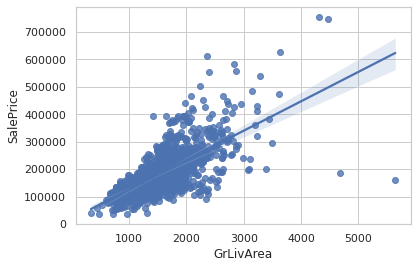

In [19]:
## Seaborn regplot으로 그리면, 
sns.regplot(x=df['GrLivArea'], y=df['SalePrice']);

In [20]:
## GrLivArea > 3500 & GrLivArea < 4500 사이의 데이터를 보겠습니다.
df[(df['GrLivArea'] > 3500) & (df['GrLivArea'] < 4500)]

,GrLivArea,LotArea,SalePrice
185,3608,22950,475000
691,4316,21535,755000
1169,3627,35760,625000
1182,4476,15623,745000


선형회귀는 주어져 있지 않은 점의 함수값을 보간(**interpolate**) 하여 예측하는데 도움을 줍니다.

예를 들어 GrLivArea 3626 ~ 4315 sqft 사이에 주택의 가격 정보가 없습니다. 이때 선형회귀 모델을 사용해 4000 sqft 주택 가격을 어림잡아 예측해 볼 수 있습니다.


물론 선형회귀모델은 기존 데이터의 범위를 넘어서는 값을 예측하기 위한 외삽(**extrapolate**)도 제공해줍니다.
저희가 지금 다루는 데이터에는 6000 sqft 이상되는 주택의 거래 정보가 없습니다.

In [21]:
df[(df['GrLivArea'] > 6000)].sort_values('GrLivArea')

,GrLivArea,LotArea,SalePrice


이런 경우는 어떻게 예측해야 할까요?

선형회귀 직선은 독립변수(independent variable, x)와 종속변수(dependent variable, y) 간의 관계를 요약해 줍니다.

- **종속변수는 반응(Response)변수, 레이블(Label), 타겟(Target)등으로 불립니다.**
- **독립변수는 예측(Predictor)변수, 설명(Explanatory), 특성(feature) 등으로 불립니다.**

## scikit-learn을 사용해서 선형회귀모델을 만들어 보겠습니다

scikit-learn은 머신러닝 모델을 만드는데 가장 많이 사용하는 라이브러리로 이번 섹션에서 계속 활용됩니다.

#### scikit-Learn을 활용해 모델을 만들고 데이터를 분석하기 위해서는 다음과 같은 데이터 구조를 사용해야 합니다:

<img src="https://www.researchgate.net/publication/301946040/figure/fig1/AS:362519232303116@1463442728351/Data-representation-in-scikit-learn.png" alt="Data representation in scikit-learn"/>

- 특성 데이터와 타겟 데이터를 나누어 줍니다.

- 특성행렬은 주로 `X` 로 표현하고 보통 2-차원 행렬입니다(`[n_samples, n_features]`). 주로 NumPy 행령이나 Pandas 데이터프레임으로 표현합니다.

- 타겟배열은 주로 y로 표현하고 보통 1차원 형태(`n_samples`) 입니다. 주로 Numpy 배열이나 Pandas Series로 표현합니다.

#### scikit-learn에는 수많은 머신러닝 모델이 구현되어 있는데 모두 유사한 프로세스를 통해서 사용할 수 있습니다. 

- 우선 여러분께서 풀어야 하는 문제를 풀기에 적합한 모델을 선택하여 클래스를 찾아본 후 관련 속성이나 하이퍼파라미터를 확인해 봅니다.
- 문제에 따라서 약간 차이가 있겠지만 위에서 살펴본 것과 같이 데이터를 준비합니다.
- `fit()` 메소드를 사용하여 모델을 학습합니다.
- 'predict()' 메소드를 사용하여 새로운 데이터를 예측합니다.

이런 프로세스는 앞으로도 계속 연습할 것이기 때문에 잘 알아 두시기 바랍니다.
- [Basics of the API](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API)

## Simple Linear Regression (단순 선형 회귀)

위에 언급한 방법에 따라서 머신러닝모델을 만들어 봅시다.

- [Scikit-Learn LinearRegression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [22]:
## Scikit-Learn 라이브러리에서 사용할 예측모델 클래스를 Import 합니다
from sklearn.linear_model import LinearRegression

In [23]:
## 예측모델 인스턴스를 만듭니다
model = LinearRegression()

In [24]:
## X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature = ['GrLivArea']
target = ['SalePrice']
X_train = df[feature]
y_train = df[target]

In [25]:
## 모델을 학습(fit)합니다
model.fit(X_train, y_train)

LinearRegression()

In [26]:
## 새로운 데이터 한 샘플을 선택해 학습한 모델을 통해 예측해 봅니다
X_test = [[4000]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} sqft GrLivArea를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

4000 sqft GrLivArea를 가지는 주택의 예상 가격은 $447090 입니다.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [27]:
## 전체 테스트 데이터를 모델을 통해 예측해 봅니다.
X_test = [[x] for x in df_t['GrLivArea']]
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [28]:
## 전체 예측값 입니다.
y_pred

array([[114557.82748987],
       [160945.27292207],
       [193084.38061182],
       ...,
       [149696.58523066],
       [122485.47405334],
       [232829.74378814]])

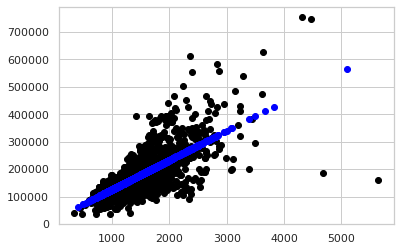

In [29]:
## train 데이터에 대한 그래프를 그려보겠습니다.
plt.scatter(X_train, y_train, color='black', linewidth=1)

## test 데이터에 대한 예측을 파란색 점으로 나타내 보겠습니다.
plt.scatter(X_test, y_pred, color='blue', linewidth=1);

## 선형회귀모델의 계수(Coefficients)

모델이 주택의 크기와 가격 사이에서 어떤 관계를 학습했을까요?

이 질문에 대한 답을 하기 위해 `LinearRegression` 객체의 `coef_`, `intercept_` 속성을 확인해 보겠습니다.
- [sckit-learn.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [30]:
## 계수(coefficient)
model.coef_

array([[107.13035897]])

In [31]:
## 절편(intercept)
model.intercept_

array([18569.02585649])

#### 예측함수를 만들어 새로운 데이터를 반복해서 예측하고 coefficient의 영향을 설명해 봅시다:

In [32]:
def explain_prediction(sqft):
    y_pred = model.predict([[sqft]])
    pred = f"{int(sqft)} sqft 주택 가격 예측: ${int(y_pred[0])} (1 sqft당 추가금: ${int(model.coef_[0])})"

    return pred

In [33]:
## square_feet = 4000 인 테스트 데이터로 예측
print(explain_prediction(4000))

4000 sqft 주택 가격 예측: $447090 (1 sqft당 추가금: $107)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


#### ipywidgets를 사용해서 sqft를 바꾸어 가며 예측해 보겠습니다.

In [35]:
from ipywidgets import interact

# 데코레이터 interact를 추가합니다.
@interact
def explain_prediction(sqft=(500,10000)):
    y_pred = model.predict([[sqft]])
    pred = f"{int(sqft)} sqft 주택 가격 예측: ${int(y_pred[0])} (1 sqft당 추가금: ${int(model.coef_[0])})"

    return pred

interactive(children=(IntSlider(value=5250, description='sqft', max=10000, min=500), Output()), _dom_classes=(…

-------------

# 다중선형회귀(Multiple Linear Regression)

- 머신러닝모델을 만들 때 학습과 테스트 데이터를 분리 해야 하는 이유를 설명할 수 있습니다.
- 다중선형회귀를 이해하고 사용할 수 있습니다.
- 과적합/과소적합을 일반화 관점에서 설명할 수 있습니다.
- 편향/분산의 트레이트오프 개념을 이해하고 일반화 관점에서 설명할 수 있습니다.

## 데이터를 학습/테스트 데이터로 나누어 봅시다.

#### 이전 강의에서와 같이 주택 가격 데이터를 사용해 보겠습니다.

In [36]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_train.csv')

In [37]:
## 컬럼명을 살펴봅시다.
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

이 데이터를 가지고 몇가지 회귀 모델을 만들어 보고, 모델의 성능을 평가하기 위해 훈련/테스트 데이터로 나누어 봅시다.

- 우리가 정말 관심있는것은 모델 학습에 사용한 **훈련(train) 데이터를 잘 맞추는 모델이 아니라, 학습에 사용하지 않은 테스트(test) 데이터를 얼마나 잘 맞추는지** 입니다.

- 데이터를 훈련/테스트 데이터로 나누어야 우리가 **만든 모델의 예측 성능을 제대로 평가**할 수 있습니다.

다시 강조하자면 **학습에 사용하는 데이터와 모델을 평가하는데 사용하는 데이터가 달라야 한다**는 의미입니다.

**그렇다면 데이터를 어떻게 나누어야 할까요?**

> 데이터를 무작위로 선택해 나누는 방법이 일반적이지만, 시계열 데이터를 가지고 과거에서 미래를 예측하려고 하는 경우 무작위로 데이터를 섞으면 절대로 안될것 입니다. 이때는 훈련 데이터 보다 테스트 데이터가 미래의 것이어야 할 것입니다.

#### 그러면 데이터를 나누어 볼까요?

이 데이터는 시간/날짜에 관한 정보를 포함한 특성들이 있습니다. 하지만 우리는 시간변화에 상관없는 집값 예측이 목표이기 때문에 **무작위로 훈련/테스트 데이터셋**으로 나누어 보겠습니다.

In [38]:
## 데이터의 75% 갯수
len(df)*0.75

1095.0

In [39]:
## train/test 데이터를 sample 메소드를 사용해 나누겠습니다.
train = df.sample(frac=0.75,random_state=1)
test = df.drop(train.index)

In [40]:
## head
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
258,259,60,RL,80.0,12435,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,172.0,Gd,TA,PConc,Gd,TA,No,GLQ,361,Unf,0,602,963,GasA,...,Y,SBrkr,963,829,0,1792,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,"2,001.0",RFn,2,564,TA,TA,Y,0,96,0,245,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,231500
267,268,75,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,Mod,SWISU,Norm,Norm,1Fam,2.5Fin,5,8,1939,1997,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,LwQ,378,Unf,0,342,720,GasA,...,Y,SBrkr,1052,720,420,2192,0,0,2,1,4,1,Gd,8,Typ,1,Gd,Detchd,"1,939.0",Unf,1,240,TA,TA,Y,262,24,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,179500
288,289,20,RL,nan,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,...,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,"1,970.0",Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
649,650,180,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,131,GLQ,499,0,630,GasA,...,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,NaN,NaN,nan,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,84500
1233,1234,20,RL,nan,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000,Unf,0,188,1188,GasA,...,Y,SBrkr,1188,0,0,1188,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,"1,959.0",RFn,2,531,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,Abnorml,142000


In [41]:
## train, test 길이 비교
len(train), len(test)

(1095, 365)

## 다중선형회귀모델을 학습해 봅시다.

이번에는 이전 강의에서 배운것 처럼
- 기준모델과 (특성 없음)
- 단순선형회귀 모델을 만들고 (특성 한 개 사용)
- 2 개 이상의 특성들을 사용하는 다중선형회귀모델을 만들어 봅시다.

### 기준모델

우선 **타겟인 SalePrice의 평균**을 기준모델로 사용해 보겠습니다. 

In [42]:
# SalePrice 평균
train['SalePrice'].mean()

180327.24200913243

In [43]:
# label 정의
target = 'SalePrice'
y_train = train[target]
y_test = test[target]

In [44]:
# SalePrice 평균값으로 예측(기준모델)
predict = y_train.mean()

In [45]:
predict

180327.24200913243

In [46]:
# 기준모델로 훈련 에러(MAE) 계산
from sklearn.metrics import mean_absolute_error
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러: {mae:.2f}')

훈련 에러: 57775.57


In [47]:
# 테스트 에러(MAE)
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 55862.90


### scikit-learn을 사용해서 단순선형회귀모델을 만들어 봅시다.

먼저 GrLivArea (지상생활면적, sqft)와 SalePrice를 사용, scatterplot을 그리고 OLS 라인을 그려 봅시다.

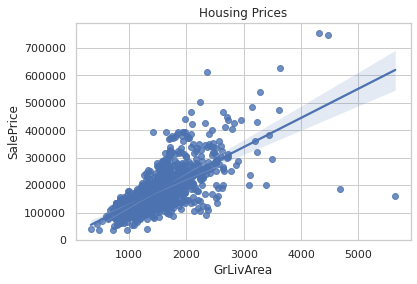

In [48]:
import seaborn as sns
sns.regplot(x=train['GrLivArea'], y=train['SalePrice']).set_title('Housing Prices');

이번에는 sklearn으로 단순선형회귀모델을 학습해 봅시다.

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

features = ['GrLivArea']
X_train = train[features]
X_test = test[features]

# 모델 fit
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 38327.78


In [50]:
# 테스트 데이터에 적용
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 35476.63


**기준모델과 비교해 보면 에러가 줄어든 것을 확인할 수 있습니다.**

### 다중선형회귀모델 학습 (특성 2개 이상)

우선 OverallQual 특성을 추가하여 그래프를 확인해 보겠습니다.

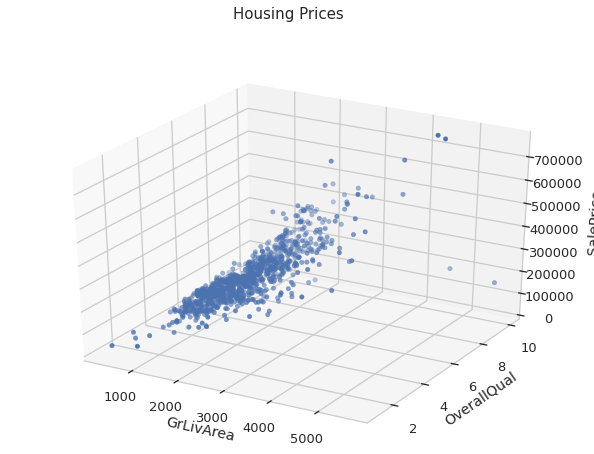

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')
fig = plt.figure()

# for 3d plot
ax = fig.gca(projection='3d')

ax.scatter(train['GrLivArea'], train['OverallQual'], train['SalePrice'])
ax.set_xlabel('GrLivArea', labelpad=12)
ax.set_ylabel('OverallQual', labelpad=10)
ax.set_zlabel('SalePrice', labelpad=20)

plt.suptitle('Housing Prices', fontsize=15)
plt.show()

# (참고) plotly를 사용해서 상대적으로 간단히 그래프를 그릴 수도 있습니다.
# px.scatter_3d(
#     train,
#     x='GrLivArea', 
#     y='OverallQual', 
#     z='SalePrice',  
#     title='House Prices'
# )

scikit-learn을 사용해서 다중선형회귀 모델을 만들어 봅시다.

In [52]:
# 다중모델 학습을 위한 특성
features = ['GrLivArea', 
            'OverallQual']
X_train = train[features]
X_test = test[features]

In [53]:
# 모델 fit
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 29129.58


In [54]:
# 테스트 데이터에 적용해 봅시다 
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 27598.31


하나의 특성을 사용한 단순선형회귀모델보다 테스트 오류가 더 줄어든 것을 확인할 수 있습니다. 

#### 단순선형회귀 모델과 비교하면 어떤가요?

단순선형회귀에서는 모델이 직선의 방정식으로 표현이 되었다면, 이번에는 특성이 두 개이므로 평면의 방정식으로 표현이 됩니다.

Plotly를 사용하여 3D 평면을 표현해 보겠습니다.

In [55]:
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import itertools

def surface_3d(df, f1, f2, target, length=20, **kwargs):
    """
    2특성 1타겟 선형모델평면을 시각화 합니다.
    
    df : 데이터프레임
    f1 : 특성 1 열 이름
    f2 : 특성 2 열 이름
    target : 타겟 열 이름
    length : 각 특성의 관측치 갯수
    
    """
    
    # scatter plot(https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)
    plot = px.scatter_3d(df, x=f1, y=f2, z=target, opacity=0.5, **kwargs)
    
    # 다중선형회귀방정식 학습
    model = LinearRegression()
    model.fit(df[[f1, f2]], df[target])    

    # 좌표축 설정
    x_axis = np.linspace(df[f1].min(), df[f1].max(), length)
    y_axis = np.linspace(df[f2].min(), df[f2].max(), length)
    coords = list(itertools.product(x_axis, y_axis))
    
    # 예측
    pred = model.predict(coords)
    z_axis = pred.reshape(length, length).T
    
    # plot 예측평면
    plot.add_trace(go.Surface(x=x_axis, y=y_axis, z=z_axis, colorscale='Viridis'))
    
    return plot

In [56]:
surface_3d(
    train,
    f1='GrLivArea', 
    f2='OverallQual', 
    target='SalePrice',  
    title='House Prices'
)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



## 회귀계수를 해석해 보고 모델을 평가해 봅시다

- 단순선형회귀식은 다음과 같았습니다: 
$y = \beta_0 + \beta_1 x $

- 지금 다룬 2특성의 다중선형회귀 식은 다음과 같습니다: 
$y = \beta_0 + \beta_1x_1 + \beta_2x_2$

- 계수들(coefficients or parameters) $\beta_0$~$\beta_2$ 는 어떻게 구할까요? 

In [57]:
## 절편(intercept)과 계수들(coefficients)
model.intercept_, model.coef_

(-102743.02342270731, array([   54.40145532, 33059.44199506]))

In [58]:
## 회귀식을 만들어 봅시다.
b0 = model.intercept_
b1, b2 = model.coef_

print(f'y = {b0:.0f} + {b1:.0f}x\u2081 + {b2:.0f}x\u2082')

y = -102743 + 54x₁ + 33059x₂


$\beta_1$과 $\beta_2$ 모두 양수입니다. 이것은 $x_1$, $x_2$이 증가할 때마다 $y$ 도 증가한다는 뜻입니다.
만약 음수인 경우에는 $y$ 가 감소한다는 뜻이겠지요.

한 번 가상의 관측 데이터를 넣어보고 모델이 어떻게 예측하는지 봅시다.

In [59]:
model.predict([[2000, 10]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([336654.30716253])

In [60]:
model.predict([[2000, 3]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([105238.21319714])

선형회귀는 다른 ML 모델에 비해 상대적으로 학습이 빠르고 설명력이 강합니다. 하지만 선형 모델의 이므로 과소적합(underfitting)이 잘 일어난다는 단점이 있습니다. 과소적합에 대해서는 강의 뒷 부분에서 편향과 분산에 대해서 다룰 때 자세히 알아보겠습니다.

### 회귀모델을 평가하는 평가지표들(evaluation metrics)

만들어진 회귀모델을 평가하는데는 다음과 같은 평가지표들이 있습니다.

* MSE (Mean Squared Error) = 
$\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2}$
* MAE (Mean absolute error) = $\frac{1}{n}\sum_{i=1}^{n}\left | y_{i} - \hat{y_{i}} \right |$
* RMSE (Root Mean Squared Error) = 
$\sqrt{MSE}$
* R-squared (Coefficient of determination) = 
$1 - \frac{\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2}}{\sum_{i=1}^{n}(y_{i} - \bar{y_{i}})^{2}} = 1 - \frac{SSE}{SST} = \frac {SSR}{SST}$

- 참고
    - SSE(Sum of Squares `Error`, 관측치와 예측치 차이): $\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2}$
    - SSR(Sum of Squares due to `Regression`, 예측치와 평균 차이): $\sum_{i=1}^{n}(\hat{y_{i}} - \bar{y_{i}})^{2}$
    - SST(Sum of Squares `Total`, 관측치와 평균 차이): $\sum_{i=1}^{n}(y_{i} - \bar{y_{i}})^{2}$ , SSE + SSR

각 평가지표의 차이를 살펴보기 위하여 간단한 데이터를 만들어 봅시다.

In [61]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

df_study = pd.DataFrame([[1, 2, 3], [2, 1, 3], [3, 3, 6], [4, 5, 9], [4, 4, 8], [5, 5, 10], [7, 7, 14], [9, 8, 17], [10, 9, 19], [10, 10, 20]])
df_study.columns = ['Q1','Q2','Total']

In [62]:
df_study

,Q1,Q2,Total
0,1,2,3
1,2,1,3
2,3,3,6
3,4,5,9
4,4,4,8
5,5,5,10
6,7,7,14
7,9,8,17
8,10,9,19
9,10,10,20


In [63]:
from IPython.display import display
from matplotlib.patches import Rectangle

def evaluation_metrics(df, feature, target, slope, intercept):
    """
    2d 선형회귀직선과 제곱오차(squared errors)를 확인하기 위한 함수
    df : Pandas 데이터프레임
    feature : 특징 열
    target : 타겟 열
    slope : 선형방정식의 기울기
    intercept : 선형방정식의 y 절편
    """
    
    x = df[feature]
    y = df[target]
    
    # plot 데이터
    ax = plt.axes()
    df.plot.scatter(feature, target, ax=ax)
    
    # 예측
    y_pred = slope * x + intercept
    
    # plot 예측
    ax.plot(x, y_pred)
    
    # Plot 제곱오차(MSE)
    x_left, x_right = ax.get_xlim() # x-axis view limits
    y_bottom, y_top = ax.get_ylim()
    scale = (x_right - x_left) / (y_top - y_bottom)

    for f, t, p in zip(x, y, y_pred):
        xy = (f, min(t, p))
        h = abs(t - p)
        w_scaled = h * scale
        ax.add_patch(Rectangle(xy=xy, width=w_scaled, height=h, alpha=0.2))
    
    # 회귀방정식 평가지표
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y, y_pred)

    display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


,Metric,Score
0,MSE,35.7
1,MAE,5.3
2,RMSE,6.0
3,R2,0.0


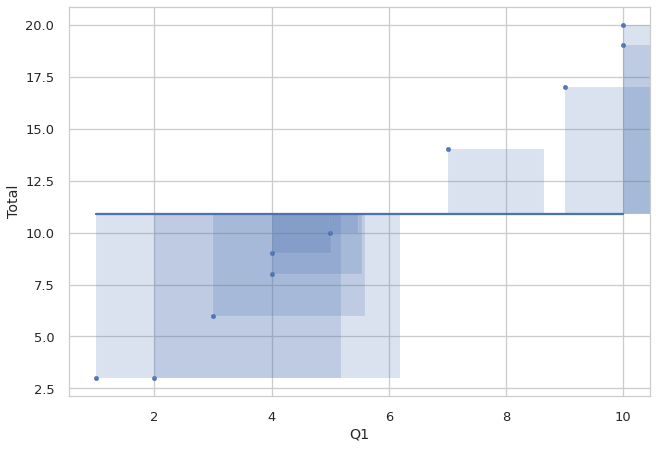

In [64]:
evaluation_metrics(df_study, 'Q1', 'Total', 0, df_study['Total'].mean())

Total 값의 평균을 회귀직선 으로 설정해 봅시다. $R^2$ 최소 값인 0 이 됩니다. 이 직선은 데이터를 전혀 설명하지 못하고 있네요.
$R^2$ 값이 1에 가까울 수록 데이터를 잘 설명하는 모델이 됩니다. 기울기와 절편를 수동적으로 조절하는 과정에서 $R^2$ 값이 음수가 나올 수도 있습니다만 이렇게 적합이 되면 안되겠지요.

이번에는 기울기를 조금 올려 보고 y절편도 조정해 보겠습니다. 에러가 많이 줄어드는 것을 볼 수 있습니다. $R^2$ 점수도 많이 올라 갔네요

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


,Metric,Score
0,MSE,8.4
1,MAE,2.4
2,RMSE,2.9
3,R2,0.8


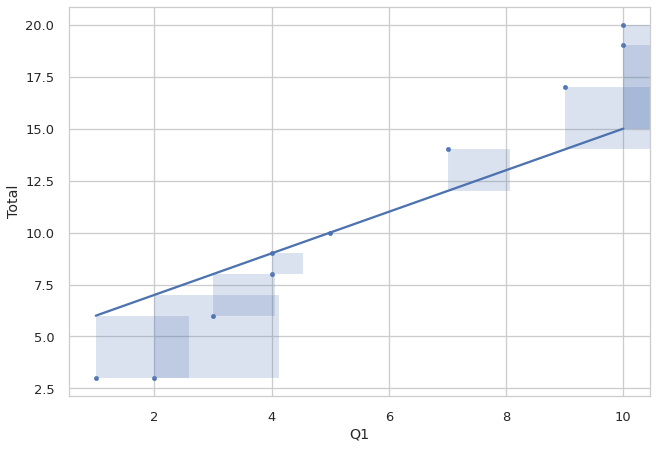

In [65]:
evaluation_metrics(df_study, 'Q1', 'Total', 1, 5)

조금 더 파라미터를 조정해 보겠습니다. 오차가 더 적어지고 $R^2$ 는 1에 매우 가까워 졌습니다.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


,Metric,Score
0,MSE,0.5
1,MAE,0.5
2,RMSE,0.7
3,R2,1.0


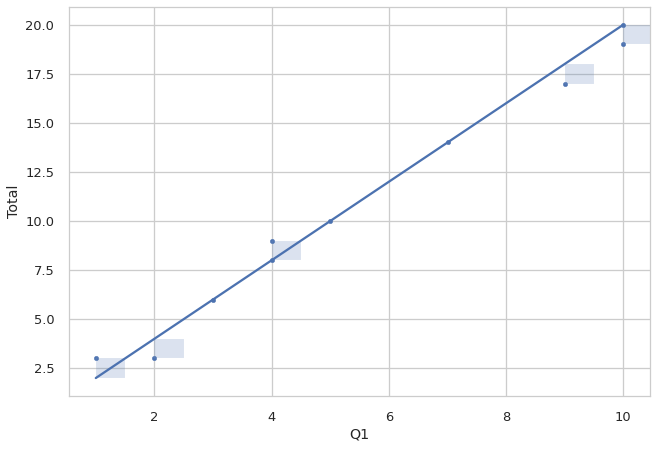

In [66]:
evaluation_metrics(df_study, 'Q1', 'Total', 2, 0)

$R^2$ 외에, MAE는 단위 유닛이 같으므로 보다 해석에 용이한 장점이 있고, MSE는 제곱을 하기 때문에 특이값에 보다 민감 합니다. RMSE는 MSE를 실제값과 유사한 단위로 변화시켜주는 장점이 있습니다.
- [회귀의 오류지표 알아보기](https://partrita.github.io/posts/regression-error/)

In [67]:
import plotly.express as px
px.scatter(
    df_study,
    x='Q1',
    y='Total',
    trendline='ols'
)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## 과적합(Overfitting)과 과소적합(Underfitting)
다음 내용을 공부하기 전에 먼저 **일반화(generalization)** 라는 용어를 살펴보겠습니다.
- 테스트데이터에서 만들어내는 오차를 **일반화** 오차라고 부릅니다.
- 훈련데이터에서와같이 테스트데이터에서도 좋은 성능을 내는 모델은 **일반화가 잘 된 모델**이라고 부릅니다.
- 모델이 너무 훈련데이터에 과하게 학습(과적합)을 하지 않도록 하는 많은 **일반화 방법**들이 있습니다.

우리는 당연히 예측모델이 훈련데이터에서보다 테스트데이터에서 오차가 적게 나오기를 기대합니다. 하지만 현실적으로 모든 데이터를 얻을 수 없기 때문에 훈련데이터로부터 일반화가 잘 되는 모델을 학습시켜야 합니다.

- **과적합**은 모델이 훈련데이터에만 특수한 성질을 과하게 학습해 일반화를 못해 결국 테스트데이터에서 오차가 커지는 현상을 말합니다
- 반대로 **과소적합**은 훈련데이터에 과적합도 못하고 일반화 성질도 학습하지 못해, 훈련/테스트 데이터 모두에서 오차가 크게 나오는 경우를 말합니다.

사실 머신러닝과정 중에서 과적합은 피할 수 없는 문제이고 완전히 극복할 수도 없습니다. 그래서 대부분 학습알고리즘은 이런 과적합을 완화시킬 수 있는 방법을 제공하기 때문에 잘 알아 두어야 하겠습니다.

### 분산/편향 트레이드오프
과/소적합은 오차의 편향(Bias)과 분산(Variance)개념과 관계가 있습니다.

결론만 우선 정리해 보면

- **분산이 높은**경우는, 모델이 학습 데이터의 노이즈에 민감하게 적합하여 테스트데이터에서 일반화를 잘 못하는 경우 즉 **과적합** 상태입니다.

- **편향이 높은**경우는, 모델이 학습 데이터에서, 특성과 타겟 변수의 관계를 잘 파악하지 못해 **과소적합** 상태입니다.

#### 조금 더 자세하게 편향과 분산에 대한 식을 살펴보면,

MSE 식을 reducible, irreducible 에러로 나누어 표현하면 결국 Bias 에러 + Variance + irre 로 나뉘게 됩니다.([Bias–variance tradeoff
](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff))

${\displaystyle \operatorname {E} _{D}{\Big [}{\big (}y-{\hat {f}}(x;D){\big )}^{2}{\Big ]}={\Big (}\operatorname {Bias} _{D}{\big [}{\hat {f}}(x;D){\big ]}{\Big )}^{2}+\operatorname {Var} _{D}{\big [}{\hat {f}}(x;D){\big ]}+\sigma ^{2}}$

${\displaystyle \operatorname {Bias} _{D}{\big [}{\hat {f}}(x;D){\big ]}=\operatorname {E} _{D}{\big [}{\hat {f}}(x;D){\big ]}-f(x)}$

${\displaystyle \operatorname {Var} _{D}{\big [}{\hat {f}}(x;D){\big ]}=\operatorname {E} _{D}[{\big (}\operatorname {E} _{D}[{\hat {f}}(x;D)]-{\hat {f}}(x;D){\big )}^{2}]}$

### 다항회귀모델을 사용해서 과적합을 만들어 봅시다.
마지막으로, 독립변수와 타겟변수 사이에 비선형 관계를 학습할 수 있는 다항회귀모델(polynomial regression)의 차수(degrees)를 조정해 회귀곡선을 만들어보는 실험을 해보겠습니다.

In [68]:
# 실험에 사용할 랜덤 데이터를 만듭니다 (30, 2)
rng = np.random.RandomState(1)
data = np.dot(rng.rand(2, 2), rng.randn(2, 30)).T
X = pd.DataFrame([i[0] for i in data])
y = pd.DataFrame([i[1] for i in data])

이번에는 훈련, 테스트셋을 scikit-learn을 사용해 나누어 보겠습니다. [train/test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [69]:
from sklearn.model_selection import train_test_split

## X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [70]:
from sklearn.preprocessing import PolynomialFeatures
X1 = np.arange(6).reshape(3, 2)
print(X1)

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X1)

# poly = PolynomialFeatures(interaction_only=True)
# poly.fit_transforim(X)


[[0 1]
 [2 3]
 [4 5]]


Sklearn의 **PolynomialFeatures**는 다항회귀모델을 쉽게 구현하도록 도와줍니다.
이름에서 알 수 있듯이 다항 특성(polynomial features)을 방정식에 추가하는 것 입니다. 다항 특성은 특성들의 상호작용을 보여줄 수 있기 때문에 상호작용특성(interaction features)라고도 부릅니다.

예를들어 $x_1$, $x_2$ 두 특성을 가진 데이터가 입력으로 들어오면 이것을 기준으로 degree=2 인 새로운 특성을 만들어 내는데 즉 특성이 다음과 같이 변합니다.
($x_1$, $x_2$) -> (1, $x_1$, $x_2$, $x_1^2$, $x_1x_2$, $x_2^2$)

degree = 3 인 경우는 특성이 더 많아 지겠지요?

In [71]:
## X_poly: [1, a, b, a^2, ab, b^2]
X_poly

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

모델의 복잡도를 계속 올려 보겠습니다. 스코어를 눈여겨 봐 주세요.
- [Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#Validation-curves-in-Scikit-Learn)

Degree=1


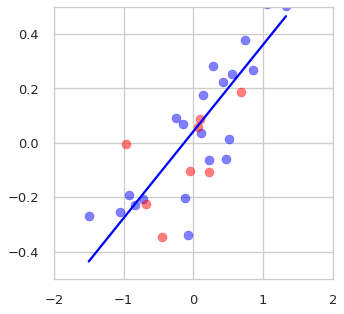

Degree=3


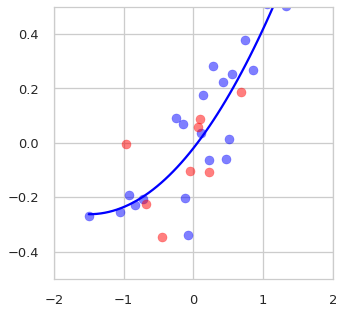

Degree=4


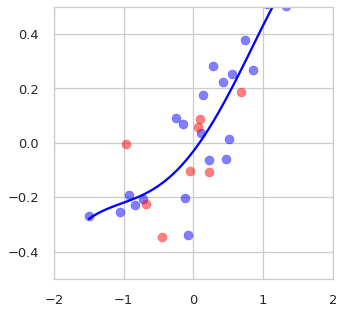

Degree=6


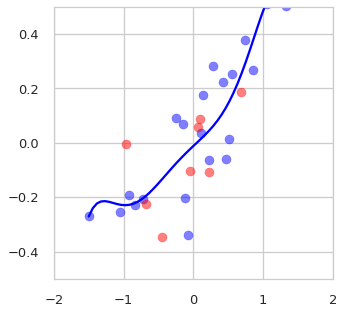

Degree=10


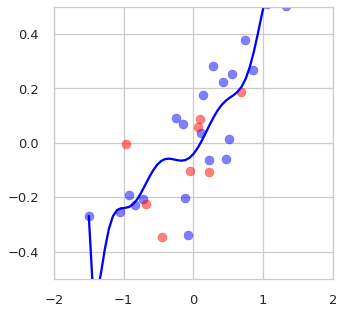

Degree=20


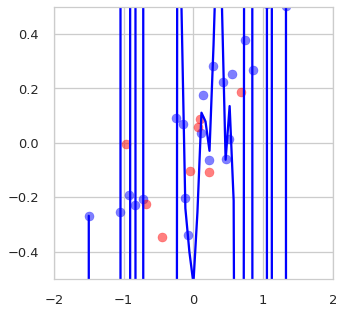

In [72]:
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5,5)

# 다항회귀모델도 결국 다중선형회귀모델로 변형하여 모델을 만들 수 있는 선형모델입니다.
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))


polynomial_degrees = [1, 3, 4, 6, 10, 20]
train_r2s = []
test_r2s = []

for degree in polynomial_degrees:
    model = PolynomialRegression(degree)
    print(f'Degree={degree}')
    
    model.fit(X_train, y_train)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    display(HTML(f'<b style="color: blue">train R2 {train_r2:.2f}</b>'))
    display(HTML(f'<b style="color: red">test R2 {test_r2:.2f}</b>'))

    plt.scatter(X_train, y_train, color='blue', alpha=0.5)
    plt.scatter(X_test, y_test, color='red', alpha=0.5)
    

    x_domain = np.linspace(X.min(), X.max())
    curve = model.predict(x_domain)
    plt.plot(x_domain, curve, color='blue')
    plt.axis([-2., 2.0, -0.5, 0.5])
    plt.show()
    display(HTML('<hr/>'))
    
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)

---------------------

# Ridge Regression

- 범주형(Cagegorical) 자료를 다루기 위한 원핫인코딩(One-hot encoding) 기법을 이해합니다.
- Ridge 회귀를 통한 특성선택(Feature selection) 과정을 이해합니다.
- 정규화(regularization)을 위한 Ridge 회귀모델을 이해하고 사용할 수 있습니다.

### 원핫인코딩을 살펴보기 위한 간단한 데이터를 준비해 봅시다.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'City': ['Seoul', 'Seoul', 'Seoul', 'Busan', 'Busan', 'Busan', 'Incheon', 'Incheon', 'Seoul', 'Busan', 'Incheon'],
    'Room': [3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 2],
    'Price': [55000, 61000, 44000, 35000, 53000, 45000, 32000, 51000, 50000, 40000, 30000]
})

In [75]:
# 데이터를 살펴봅니다.
df

,City,Room,Price
0,Seoul,3,55000
1,Seoul,4,61000
2,Seoul,3,44000
3,Busan,2,35000
4,Busan,3,53000
5,Busan,3,45000
6,Incheon,3,32000
7,Incheon,3,51000
8,Seoul,3,50000
9,Busan,3,40000


이처럼 데이터에 문자열(String)을 만나게 되면 어떻게 처리해야 할까요? City 칼럼에 있는 데이터는 도시 지역을 구분하는 범주형 변수(Categorical vaiable)입니다.

범주형 자료는 순서가 없는 **명목형(nominal)**과, 순서가 있는 **순서형(ordinal)**으로 나뉩니다.

도시는 높고 낮음이나 우선순위를 나타낼 필요가 없고 단지 구분만 되면 되기 때문에 명목형 범주형 변수로 보면 됩니다.

#### 범주형 변수를 원핫인코딩으로 변환하는 방법에 대한 모식도를 보겠습니다.

![one-hot](https://i.imgur.com/mtimFxh.png)
- color 변수를 원핫인코딩으로 변환해서 가능한 모든 범주를 열로 나타내었습니다.([one-hot-encoding](https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding))

데이터를 살펴보겠습니다.

In [79]:
## City의 범주 비율을 살펴보겠습니다.
df['City'].value_counts(normalize=True)

Seoul      0.363636
Busan      0.363636
Incheon    0.272727
Name: City, dtype: float64

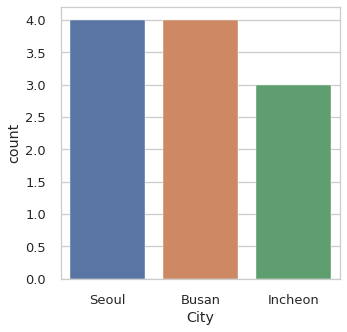

In [80]:
## seaborn countplot, City
sns.countplot(x=df['City']);

In [81]:
## Price 평균
df['Price'].mean()

45090.90909090909

In [82]:
## City 각 범주에 대한 Price 값의 평균을 보겠습니다.
df.groupby('City')['Price'].mean()

City
Busan      43250.000000
Incheon    37666.666667
Seoul      52500.000000
Name: Price, dtype: float64

In [83]:
## aggregation을 사용해 City 각 범주에 대한 여러 통계량을 볼 수도 있습니다.(min, max, mean, median)
df.groupby('City')['Price'].agg(['min','max','mean','median'])

,min,max,mean,median
City,,,,
Busan,35000,53000,43250.000000,42500
Incheon,30000,51000,37666.666667,32000
Seoul,44000,61000,52500.000000,52500


원핫인코딩을 수행하면 각 카테고리에 해당하는 변수들이 모두 차원에 더해지게 됩니다. 그러므로 카테고리가 너무 많은 경우(high cardinality)에는 사용하기 적합하지 않습니다. 

[집합의크기(Cardinality)](https://simple.wikipedia.org/wiki/Cardinality):

> In mathematics, the cardinality of a set means the number of its elements. For example, the set A = {2, 4, 6} contains 3 elements, and therefore A has a cardinality of 3.

* City의 각 범주를 1,2,3 이렇게 순서형 인코딩(ordinal encoding)를 하면 범주형 값들이 대소관계를 가지므로 주의해야 합니다.

우선 pandas get_dummies를 사용하여 간단하게 원핫인코딩을 수행해 봅시다.

In [84]:
## get_dummies 를 사용한 원핫인코딩
df_oh = pd.get_dummies(df, prefix=['City'])

df_oh

,Room,Price,City_Busan,City_Incheon,City_Seoul
0,3,55000,0,0,1
1,4,61000,0,0,1
2,3,44000,0,0,1
3,2,35000,1,0,0
4,3,53000,1,0,0
5,3,45000,1,0,0
6,3,32000,0,1,0
7,3,51000,0,1,0
8,3,50000,0,0,1
9,3,40000,1,0,0


In [85]:
## 불필요한 요소를 없인 더미 코딩
df_dum = pd.get_dummies(df, prefix=['City'], drop_first=True)
df_dum

,Room,Price,City_Incheon,City_Seoul
0,3,55000,0,1
1,4,61000,0,1
2,3,44000,0,1
3,2,35000,0,0
4,3,53000,0,0
5,3,45000,0,0
6,3,32000,1,0
7,3,51000,1,0
8,3,50000,0,1
9,3,40000,0,0


### 간단한 선형회귀 모델을 만들어 원핫인코딩 특성을 사용해 보겠습니다.

In [86]:
## import LinearRegression
from  sklearn.linear_model import LinearRegression

## Initialize LinearRegression
model_oh = LinearRegression()

In [87]:
## 모델 학습(fit)
model_oh.fit(df_oh[['City_Seoul','City_Busan','City_Incheon']], df_oh['Price'])

LinearRegression()

In [88]:
## model coef_, intercept_
print("coefficients: ", model_oh.coef_)
print("intercept:" , model_oh.intercept_)

coefficients:  [ 8027.77777778 -1222.22222222 -6805.55555556]
intercept: 44472.22222222222


In [89]:
# 더미 코딩
model_dum = LinearRegression()
model_dum.fit(df_oh[['City_Seoul', 'City_Incheon']], df_oh['Price'])
print("coefficient: ", model_dum.coef_)
print("intercept: ", model_dum.intercept_)

coefficient:  [ 9250.         -5583.33333333]
intercept:  43250.0


In [90]:
import plotly.express as px
px.scatter(
    df_oh,
    x='City_Seoul',
    y='Price',
    trendline='ols'
)

In [91]:
import plotly.express as px
px.scatter(
    df_oh,
    x='City_Busan',
    y='Price',
    trendline='ols'
)

#### Category_encoders
category_encoders 라이브러리를 사용하면 범주형 데이터에만('City') 원핫인코딩을 수행할 수 있습니다.
- [OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html)
- [category_encoders](https://github.com/scikit-learn-contrib/categorical-encoding)
    - A set of scikit-learn-style transformers for encoding categorical variables into numeric by means of different techniques.

In [92]:
features = ['City','Room']
target = 'Price'

# 이번에는 훈련/테스트 데이터를 분리해 만들어 보겠습니다.
X_train = df[features][:8]
y_train = df[target][:8]
X_test = df[features][8:]
y_test = df[target][8:]

카테고리값을 원핫인코딩을 사용하여 숫자로 변환합니다

In [93]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 484 kB/s 


In [94]:
## import OneHotEncoder
from category_encoders import OneHotEncoder

## 원핫 인코딩
encoder = OneHotEncoder(use_cat_names = True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


category_encoders를 사용하면 범주형변수를 가진 특성만 원핫인코딩을 수행합니다.

In [95]:
## show X_train
X_train.head()

,City_Seoul,City_Busan,City_Incheon,Room
0,1,0,0,3
1,1,0,0,4
2,1,0,0,3
3,0,1,0,2
4,0,1,0,3


In [96]:
## show X_test
X_test

,City_Seoul,City_Busan,City_Incheon,Room
8,1,0,0,3
9,0,1,0,3
10,0,0,1,2


--------------------

#### 킹카운티 주택 가격 데이터를 사용해서 특성 선택(feature selection)에 관해 배워보겠습니다.

In [106]:
# import house data
# df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

#date 불러올때 바로 date64로 반영하는 것도 가능함. 단, 날짜 컬럼을 미리 확인해주어야함.
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv', parse_dates = ['date'])


In [103]:
## show columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [107]:
## show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [108]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [109]:
## date 특성
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [101]:
## to_datetime을 통해 시간과 날짜를 다루기 쉬운 datetime64 형태로 변환합니다.

#df['date'] = pd.to_datetime(df['date'])

In [110]:
## 변환된 date를 정렬해서 보겠습니다. 저장되지는 않습니다.
df['date'].sort_values()

16768   2014-05-02
9596    2014-05-02
9587    2014-05-02
20602   2014-05-02
11577   2014-05-02
           ...    
7898    2015-05-14
928     2015-05-14
5637    2015-05-15
13053   2015-05-24
16594   2015-05-27
Name: date, Length: 21613, dtype: datetime64[ns]

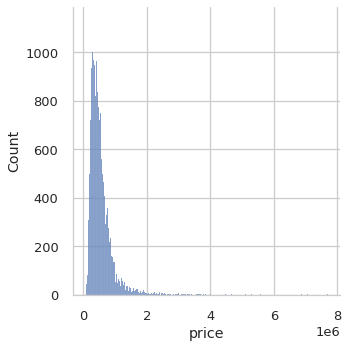

In [111]:
## displot, 'price'
sns.displot(df['price']);

price 값이 상위 5%, 하위 5%인 데이터를 삭제해 봅시다

In [112]:
# np.percentile 사용해 이상치 제거
df = df[(df['price'] >= np.percentile(df['price'], 5)) & 
        (df['price'] <= np.percentile(df['price'], 95))] 

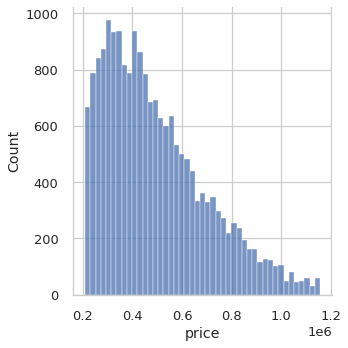

In [113]:
# displot, 'price'
sns.displot(df['price']);

In [114]:
## 2015-03-01을 기준으로 훈련/테스트 세트를 분리합니다.
cutOff = pd.to_datetime('2015-03-01')
train = df[df['date'] < cutOff]
test  = df[df['date'] >= cutOff]

In [115]:
## train/test shape
train.shape, test.shape

((15208, 21), (4303, 21))

## 특성 선택(Feature selection)

특성공학(feature engineering)이 무엇일까요?
- [Wiki, Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

**특성공학**은 과제에 적합한 특성을 만들어 내는 과정입니다. 이 프로세스는 실무 현장에서 가장 많은 시간이 소요되는 작업 중 하나입니다.

이제 사이킷런의 SelectKBest를 사용해서 회귀모델에 중요한 특성을 선택해 보겠습니다.
- [SelectKBest](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)

In [116]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Feature description**
- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

#### 특성 선택에 앞서 몇가지 새로운 특성들를 생성하고 지워 봅시다.

In [117]:
def engineer_features(X):

    # pandas.DataFrame.copy()
    X = X.copy()
    
    ## 욕실 갯수을 정수형으로 처리합니다.
    X['bathrooms'] = X['bathrooms'].round(0).astype(int)

    ## 총 방 수를 합하여 rooms로 합쳐 봅시다.
    X['rooms'] = X['bedrooms'] + X['bathrooms']


    ## 사용하지 않을 특성을 삭제합니다.
    X = X.drop(['id', 'date', 'waterfront'],axis=1)

    return X

train = engineer_features(train)
test = engineer_features(test)

In [118]:
# 변경된 테이블을 확인합니다.
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rooms
0,221900.0,3,1,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4
1,538000.0,3,2,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,5
3,604000.0,4,3,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,7
4,510000.0,3,2,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,5
6,257500.0,3,2,1715,6819,2.0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,5


이런 방법으로 선택 가능한 특성들의 가지수를 계산해 봅시다.
[참고해 보세요, combinations](https://en.wikipedia.org/wiki/Combination)

In [119]:
from math import factorial

n = len(train.columns)

def n_choose_k(n, k):
    return factorial(n)/(factorial(k)*factorial(n-k))

combinations = sum(n_choose_k(n,k) for k in range(1,n+1))

combinations

# print(f'{combinations:,.0f}')

524287.0

이렇게 가능한 방법이 많은데 어떻게 필요한 좋은 특성들만 뽑을 수 있을까요? 이것을 수작업으로 할 수 없으니 SelectKBest를 사용해서 유용한 특성들을 찾아 봅시다.

[Scikit-Learn User Guide on Univariate Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection).

In [120]:
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rooms
0,221900.0,3,1,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4
1,538000.0,3,2,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,5
3,604000.0,4,3,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,7
4,510000.0,3,2,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,5
6,257500.0,3,2,1715,6819,2.0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,5


#### 데이터를 훈련/테스트 데이터로 분리합니다.

In [121]:
target = 'price'

## X_train, y_train, X_test, y_test 데이터로 분리
X_train = train.drop(columns=target)
y_train = train[target]
X_test = test.drop(columns=target)
y_test = test[target]

#### SelectKBest를 사용해 가장 효과적인 특성 K개를 골라보겠습니다.

In [122]:
# target(Price)와 가장 correlated 된 features 를 k개 고르는 것이 목표입니다.

## f_regresison, SelectKBest
from sklearn.feature_selection import f_regression, SelectKBest

## selctor 정의합니다.
selector = SelectKBest(score_func=f_regression, k=10)

## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)

## 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)


X_train_selected.shape, X_test_selected.shape

((15208, 10), (4303, 10))

#### 선택된 특성을 보겠습니다.

In [123]:
all_names = X_train.columns

## selector.get_support()
selected_mask = selector.get_support()

## 선택된 특성들
selected_names = all_names[selected_mask]

## 선택되지 않은 특성들
unselected_names = all_names[~selected_mask] 

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade',
       'sqft_above', 'lat', 'sqft_living15', 'rooms'],
      dtype='object')
Unselected names:  Index(['sqft_lot', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'long', 'sqft_lot15'],
      dtype='object')


#### 특성의 수 k 를 어떻게 결정하는게 좋을지 알아 보겠습니다.

1 features
Selected names:  Index(['grade'], dtype='object')
Test MAE: $132,345
Test R2: 0.31754785238363403 

2 features
Selected names:  Index(['sqft_living', 'grade'], dtype='object')
Test MAE: $127,783
Test R2: 0.369134160764375 

3 features
Selected names:  Index(['sqft_living', 'grade', 'sqft_living15'], dtype='object')
Test MAE: $127,304
Test R2: 0.3740237754083221 

4 features
Selected names:  Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')
Test MAE: $125,997
Test R2: 0.3843295422396895 

5 features
Selected names:  Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')
Test MAE: $126,001
Test R2: 0.3843096242173436 

6 features
Selected names:  Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat',
       'sqft_living15'],
      dtype='object')
Test MAE: $101,338
Test R2: 0.5538510966807262 

7 features
Selected names:  Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat',
       'sqft_liv

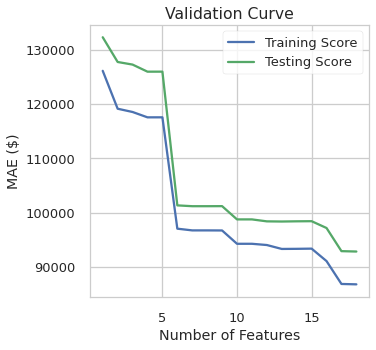

In [124]:
# features를 몇 개 선책하는 것이 좋은지 알아 봅시다.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

training = []
testing = []
ks = range(1, len(X_train.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    all_names = X_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)

    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

-----------------

## Ridge Regression 모델 학습

재미있는 부분은 Ridge 회귀는 기존 다중회귀선을 훈련데이터에 덜 적합이 되도록 만든다는 것입니다. 그 결과로 더 좋은 모델이 만들어 집니다.
다음 식을 살펴 보겠습니다.

$\beta_{ridge}$:  $argmin[\sum_{i=1}^n(y_i - \beta_0 - \beta_1x_{i1}-\dotsc-\beta_px_{ip})^2 + \lambda\sum_{j=1}^p\beta_j^2]$

n: 샘플수, p: 특성수, $\lambda$: 튜닝 파라미터(패널티)
참고: alpha, lambda, regularization parameter, penalty term 모두 같은 뜻 입니다.

Ridge 회귀를 사용하는 이유는 무엇일까요?
Ridge 회귀는 **과적합을 줄이기 위해서** 사용하는 것입니다. 과적합을 줄이는 간단한 방법 중 한 가지는 모델의 복잡도를 줄이는 방법입니다. 특성의 갯수를 줄이거나 모델을 단순한 모양으로 적합하는 것입니다.

앞서 우리는 모델학습에 있어서 편향(bias)과 분산(variance)의 영향에 대해 배웠습니다.
Ridge 회귀는 이 **편향을 조금 더하고, 분산을 줄이는 방법**으로 정규화(Regularization)를 수행합니다.
여기서 말하는 정규화는 모델을 변형하여 과적합을 완화해 일반화 성능을 높여주기 위한 기법을 말합니다.

정규화의 강도를 조절해주는 패널티값인 람다는 다음과 같은 성질이 있습니다.

$\lambda$ → 0,   $\beta_{ridge}$ → $\beta_{OLS}$

$\lambda$ → ∞,   $\beta_{ridge}$ → 0.


### OLS vs Ridge

이제 OLS와 Ridge 회귀를 그래프를 그려보며 비교해 봅시다.

간단히 사용할 데이터는 — [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), dataset III 입니다:

#### Anscome's quartet 데이터를 불러옵니다.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


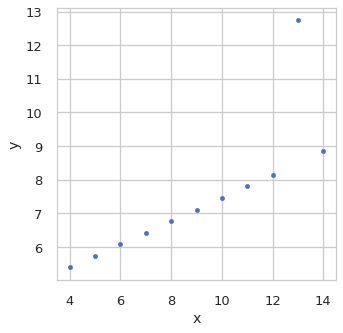

In [125]:
import seaborn as sns
ans = sns.load_dataset('anscombe').query('dataset=="III"')
ans.plot.scatter('x', 'y');

#### OLS

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


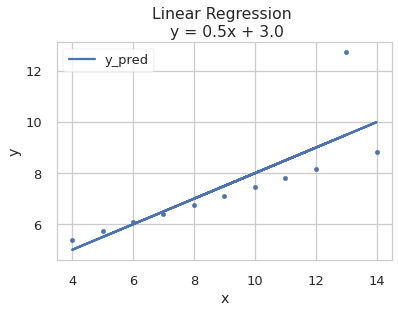

In [126]:
%matplotlib inline

ax = ans.plot.scatter('x', 'y')

# OLS 
ols = LinearRegression()
ols.fit(ans[['x']], ans['y'])

# 회귀계수와 intercept를 확인합니다.
m = ols.coef_[0].round(2)
b = ols.intercept_.round(2)
title = f'Linear Regression \n y = {m}x + {b}'

# 훈련 데이터로 예측을 합니다.
ans['y_pred'] = ols.predict(ans[['x']])

ans.plot('x', 'y_pred', ax=ax, title=title);

### Ridge Regression

#### $\lambda$ 값을 증가시키며 그래프를 통해 회귀계수의 변화를 살펴보겠습니다.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



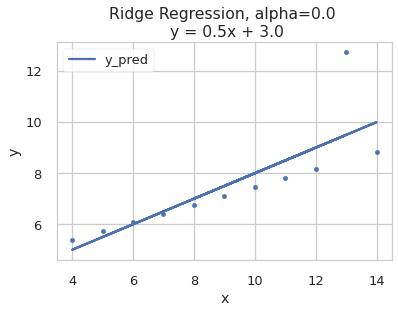

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



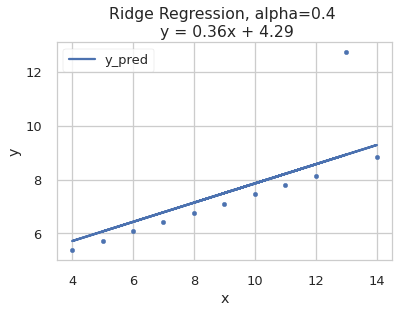

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



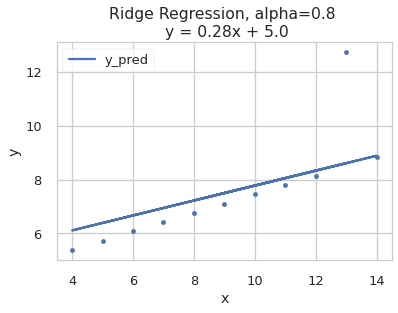

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



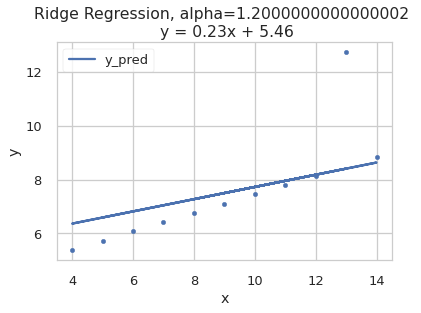

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



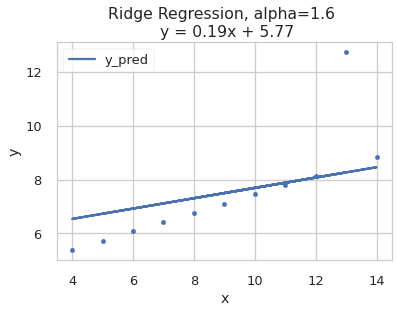

In [127]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

def ridge_anscombe(alpha):
    """
    alpha : lambda, penalty term
    """
    ans = sns.load_dataset('anscombe').query('dataset=="III"')

    ax = ans.plot.scatter('x', 'y')

    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(ans[['x']], ans['y'])

    # 회귀계수와 intercept를 가져옵니다.
    m = ridge.coef_[0].round(2)
    b = ridge.intercept_.round(2)
    title = f'Ridge Regression, alpha={alpha} \n y = {m}x + {b}'

    # 예측
    ans['y_pred'] = ridge.predict(ans[['x']])

    ans.plot('x', 'y_pred', ax=ax, title=title)
    plt.show()
    
# 여러 알파값으로 반복해 그래프를 그립니다.
alphas = np.arange(0, 2, 0.4)
for alpha in alphas:
    ridge_anscombe(alpha=alpha)

그래프를 보면, alpha = 0인 경우에는 OLS 와 같은 그래프 형태로 같은 모델 임을 확인 할 수 있고.
alpha 값이 커질 수록 직선의 기울기가 0에 가까워 지면서 평균 기준모델(baseline) 과 비슷해지는 모습을 볼 수 있습니다.

이 패널티값을 보다 효율적으로 구할 수 있는 방법이 있을까요?

[The StatQuest video answers,](https://youtu.be/Q81RR3yKn30?t=602)
> So how do we decide what value to give lambda? We just try a bunch of values for lambda, and use cross-validation
typically 10-fold cross-validation, to determine which one results in the lowest variance.


어떤 특별한 공식이 있는 것은 아니며, 여러 패널티 값을 가지고 검증실험을 해 보는 방법을 사용합니다. 교차검증(Cross-validation)을 사용해 훈련/검증 데이터를 나누어 검증실험을 진행하면 됩니다.(교차검증은 다음 강의에 더 자세히 다룹니다.)

sklearn에서 내장된 교차검증 알고리즘을 적용하는 [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)를 제공합니다.

#### RidgeCV를 통한 최적 패널티(alpha, lambda) 검증

In [128]:
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.05, 0.1, 0.2, 1.0, 10.0, 100.0]

ridge = RidgeCV(alphas=alphas, normalize=True, cv=3)
ridge.fit(ans[['x']], ans['y'])
print("alpha: ", ridge.alpha_)
print("best score: ", ridge.best_score_)

alpha:  0.2
best score:  0.4389766255562206


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import mak

다음 Ridge 회귀 직선의 생김새는 OLS매우 비슷하지만 이상치(outlier) 영향을 덜 받습니다.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


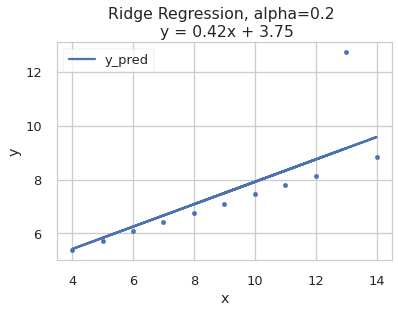

In [129]:
ax = ans.plot.scatter('x', 'y')

m = ridge.coef_[0].round(2)
b = ridge.intercept_.round(2)
title = f'Ridge Regression, alpha={ridge.alpha_} \n y = {m}x + {b}'

ans['y_pred'] = ridge.predict(ans[['x']])

ans.plot('x', 'y_pred', ax=ax, title=title)
plt.show()

#### House data
이제 다시 집값 예측 데이터로 돌아와서, ridge 회귀의 패널티에 대한 영향을 확인해 보겠습니다. 특성은 sqft_living를 사용해 그래프를 그려보겠습니다.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Ridge Regression, with alpha=0.001
Test MAE: $136,544


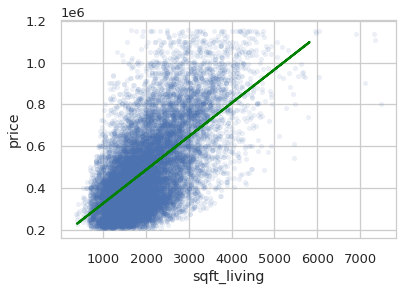

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Ridge Regression, with alpha=0.01
Test MAE: $136,539


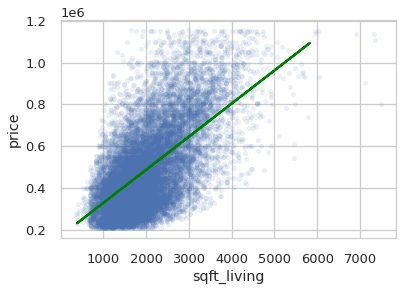

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Ridge Regression, with alpha=0.1
Test MAE: $136,740


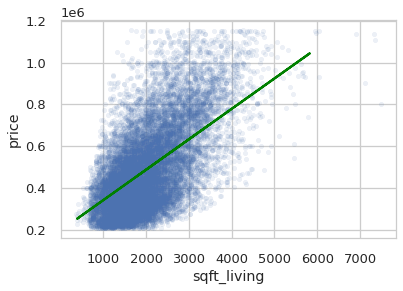

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Ridge Regression, with alpha=1.0
Test MAE: $143,916


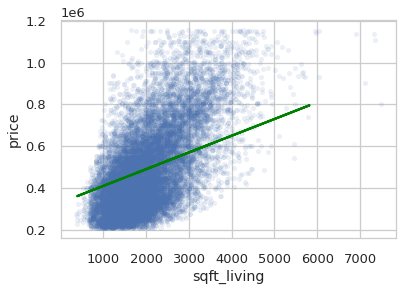

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Ridge Regression, with alpha=10.0
Test MAE: $160,541


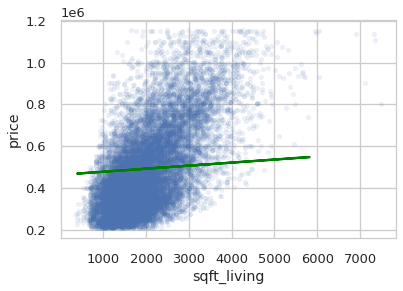

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Ridge Regression, with alpha=100.0
Test MAE: $164,673


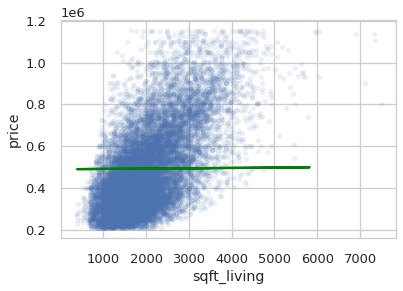

In [135]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
for alpha in [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]:
    
    feature = 'sqft_living'
    print(f'Ridge Regression, with alpha={alpha}')
    model = Ridge(alpha=alpha, normalize=True)
    model.fit(X_train[[feature]], y_train)

    
    # Get Test MAE
    y_pred = model.predict(X_test[[feature]])    
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Test MAE: ${mae:,.0f}')
    
    train.plot.scatter(feature, target, alpha=0.1)
    plt.plot(X_test[feature], y_pred, color='green')
    plt.show()

### 이번에는 여러 특성을 사용해서 Ridge 회귀를 학습해 봅시다.

Ridge Regression, alpha=0.001
Test MAE: $92,824
Test R2: 0.633


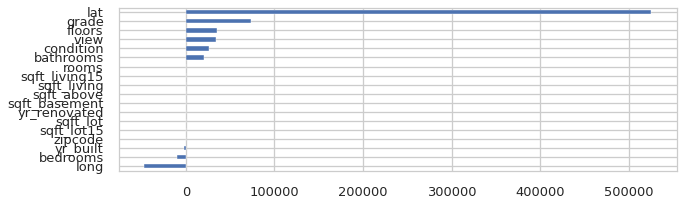

Ridge Regression, alpha=0.005
Test MAE: $92,812
Test R2: 0.633


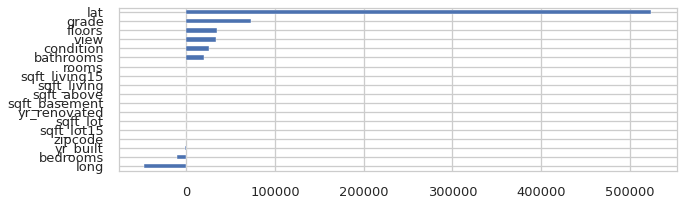

Ridge Regression, alpha=0.01
Test MAE: $92,801
Test R2: 0.633


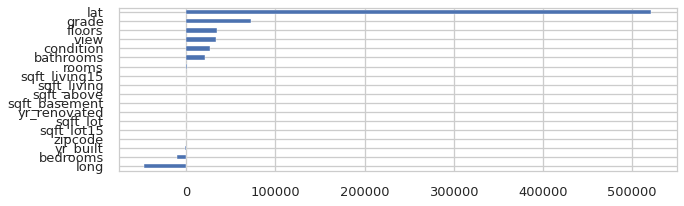

Ridge Regression, alpha=0.02
Test MAE: $92,794
Test R2: 0.632


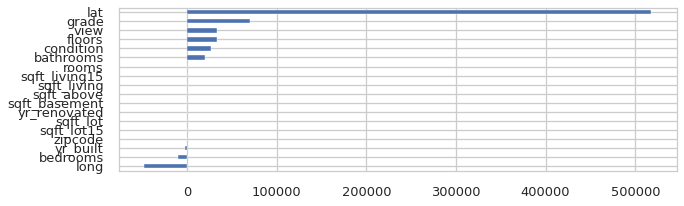

Ridge Regression, alpha=0.03
Test MAE: $92,800
Test R2: 0.632


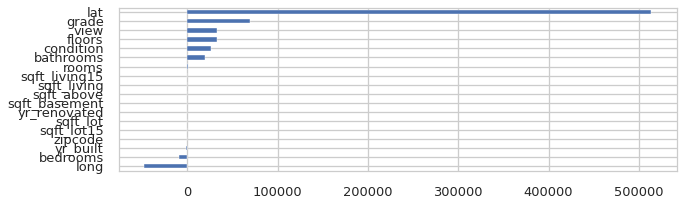

Ridge Regression, alpha=0.1
Test MAE: $93,186
Test R2: 0.627


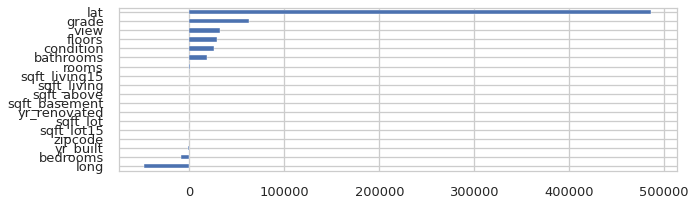

Ridge Regression, alpha=1.0
Test MAE: $107,595
Test R2: 0.536


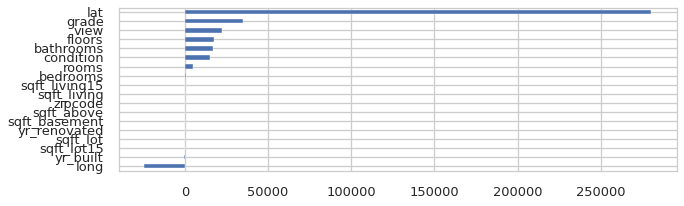

Ridge Regression, alpha=1
Test MAE: $107,595
Test R2: 0.536


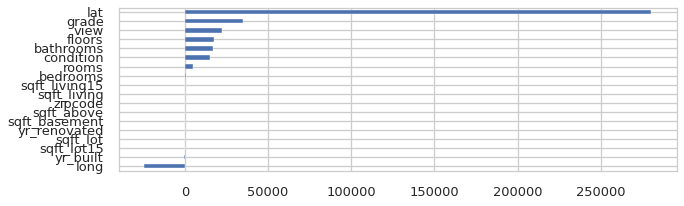

Ridge Regression, alpha=100.0
Test MAE: $162,268
Test R2: 0.033


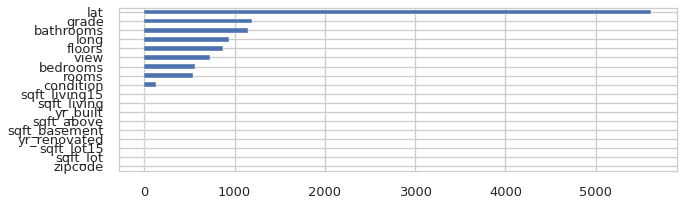

Ridge Regression, alpha=1000.0
Test MAE: $164,890
Test R2: 0.001


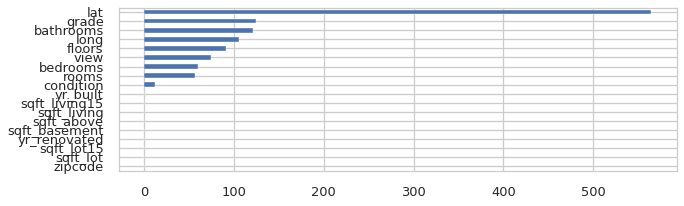

In [136]:
from sklearn.metrics import r2_score

for alpha in [0.001, 0.005, 0.01, 0.02, 0.03, 0.1, 1.0, 1, 100.0, 1000.0]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    model = Ridge(alpha=alpha, normalize=True)  
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # MAE for test
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2:,.3f}')
    
    # plot coefficients
    coefficients = pd.Series(model.coef_, X_train.columns)
    plt.figure(figsize=(10,3))
    coefficients.sort_values().plot.barh()
    plt.show()

In [134]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def RidgeRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         Ridge(**kwargs))


for alpha in [0.001, 0.01, 0.0025, 0.05, 0.09, 0.12, 0.4, 1.0, 1, 5, 10, 100]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    model = RidgeRegression(alpha=alpha, normalize=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # MAE for test
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridge"].coef_
print(f'Number of Features: {len(coefs)}')

Ridge Regression, alpha=0.001
Test MAE: $91,018
R2 Score: 0.0060

Ridge Regression, alpha=0.01
Test MAE: $91,045
R2 Score: 0.5376

Ridge Regression, alpha=0.0025
Test MAE: $91,320
R2 Score: 0.2307

Ridge Regression, alpha=0.05
Test MAE: $90,651
R2 Score: 0.6430

Ridge Regression, alpha=0.09
Test MAE: $90,676
R2 Score: 0.6467

Ridge Regression, alpha=0.12
Test MAE: $90,724
R2 Score: 0.6466

Ridge Regression, alpha=0.4
Test MAE: $91,147
R2 Score: 0.6421

Ridge Regression, alpha=1.0
Test MAE: $91,804
R2 Score: 0.6355

Ridge Regression, alpha=1
Test MAE: $91,804
R2 Score: 0.6355

Ridge Regression, alpha=5
Test MAE: $96,994
R2 Score: 0.5987

Ridge Regression, alpha=10
Test MAE: $102,946
R2 Score: 0.5626

Ridge Regression, alpha=100
Test MAE: $128,158
R2 Score: 0.3874

Number of Features: 1330


### 자 이제 마지막으로 최종 모델을 만들어 보도록 하겠습니다.

RidgeCV를 사용하여 최적의 alpha값을 찾아내어 모델 학습을 완료해 보겠습니다.

In [137]:
def RidgeCVRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         RidgeCV(**kwargs))

# alphas = np.linspace(0.01, 0.5, num=20)
alphas = np.arange(0.01, 0.2, 0.01)

model = RidgeCVRegression(alphas=alphas, normalize=True, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}') # best score: R2

Test MAE: $90,647
R2 Score: 0.6460

Number of Features: 1330
alpha: 0.06999999999999999
cv best score: 0.6908247029544381


패널티값을 0.07로 주었을 때 cv 점수는 높은데 실제 테스트데이터에서 R2 스코어는 낮게 나오고 있습니다

#### 최종모델

최종 모델을 만들기 위해서는 가지고 있는 데이터를 다 사용해 최적의 모델을 만들어야 합니다.

지금 가지고 있는 테스트 데이터를 검증 데이터로 사용하려면 RidgeCV에 훈련 데이터로 함께 넣어 주어야 합니다.
RidgeCV내에서 훈련 데이터를 훈련/검증 데이터로 나누어 최고 스코어를 가지는 alpha를 찾아 줄 것입니다.

In [138]:
X_total = pd.concat([X_train, X_test])
y_total = pd.concat([y_train, y_test])

In [139]:
# 모든 데이터를 사용해 최종 모델을 만듭니다.
model = RidgeCVRegression(alphas=alphas, normalize=True, cv=5)
model.fit(X_total, y_total)

coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}')

Number of Features: 1330
alpha: 0.060000000000000005
cv best score: 0.6801974133016854


In [140]:
coefs.max(), coefs.mean()

(69149.10323353522, 55.70723729013479)

In [141]:
# 회귀계수들을 정렬합니다.
coefs.sort()

In [142]:
coefs

array([-1340.15173204, -1124.35937697,  -825.00983454, ...,
        1715.03276605,  3948.7451279 , 69149.10323354])

#### 회귀계수를 그래프로 그려보겠습니다.
몇몇 중요한 특성들만 회귀계수가 크고 대부분 0 근처에 있음을 볼 수 있습니다.

In [ ]:
plt.plot(coefs)

Ridge 회귀는 정규화를 통해 특이값으로 인한 과도한 기울기를 보정해줍니다. 또한 영향력이 낮은 특성의 회귀계수의 값을 감소시켜 특징선택 효과를 가져옵니다.

----------------------------